### fMRI Visualization of Anxiety-Related Brain Activity
##### Creator: Danique Kreike
##### Completed on 04-12-2024
##### Link of Neurosynt images: https://neurosynth.org/analyses/terms/anxiety/

#### Locating and loading the fMRI files

This code defines a function `find_mri_files` that searches for MRI files with specific extensions (e.g., `.nii`, `.nii.gz`) within a given folder. The function uses the `glob` module to search for files matching the specified patterns. The `os` module helps create file paths that work correctly on any operating systemThe `folder_path` argument allows the user to specify the directory to search in, and the function returns a list of matching file paths. 

In the following code, the function is called with the current directory (`'./'`), and the list of found MRI files is printed to verify the correct files are found.

In [ ]:
# Locate and load the files
import os
import glob

def find_mri_files(folder_path, extensions=[".nii", ".nii.gz"]):
    mri_files = []
    for ext in extensions:
        mri_files.extend(glob.glob(os.path.join(folder_path, f"*{ext}")))
    return mri_files

mri_files = find_mri_files('./')  # Adjust folder path if necessary
print("Found MRI files:", mri_files)


Found MRI files: ['.\\anatomical.nii', '.\\anxiety_uniformity-test_z_FDR_0.01.nii.gz']


#### Visualizing fMRI Data for Anxiety

This code uses the `nilearn.plotting` package to create a statistical map visualization of the fMRI data related to anxiety. The function `plot_stat_map` overlays the functional data onto the anatomical reference image and `bg_img=anatomical_image` ensures the anatomical image is the background image. The image is customized with the following functions:
- **title**: This adds a title to the image
- **colorbar=True**: This adds a colorbar that indicates the scale of the values represented by the colormap
- **cmap**: This defines how data values are mapped to colors in visualization 
- **threshold**: This excludes values below this level 
- **cut_coords**: This controls which parts of the brain are displayed to focus on the regions of interest

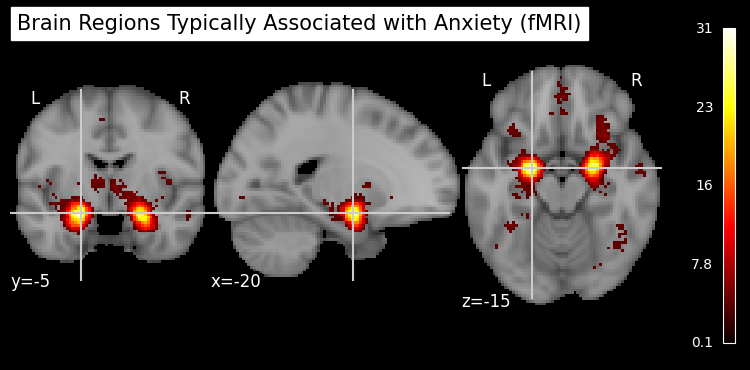

In [10]:
# Visualize fMRI data
from nilearn import plotting

functional_image = ".\\anxiety_uniformity-test_z_FDR_0.01.nii.gz"
anatomical_image = ".\\anatomical.nii"

plotting.plot_stat_map(stat_map_img=functional_image,
    bg_img=anatomical_image,
    colorbar=True,
    title="Brain Regions Typically Associated with Anxiety (fMRI)",
    black_bg=True,
    cmap="hot",
    threshold=0.1,
    cut_coords=(-20,-5,-15))

plotting.show()

### Plotting the Histogram of the Data

This code visualizes the positive values of the functional data file in a histogram. See code cell below for an explanation of the packages and functions used. The image is costumized with the following functions:
- **plt.figure**: Allows you to customize the height and width of the figure
- **plt.hist**: Allows you to customize the visualization of the histogram
- **plt.title**: This adds a title to the histogram
- **plt.xlabel**: This adds a title to the x-axis
- **plt.ylabel**: This adds a title to the y-axis
- **plt.grid**: This adds a grid for better readability

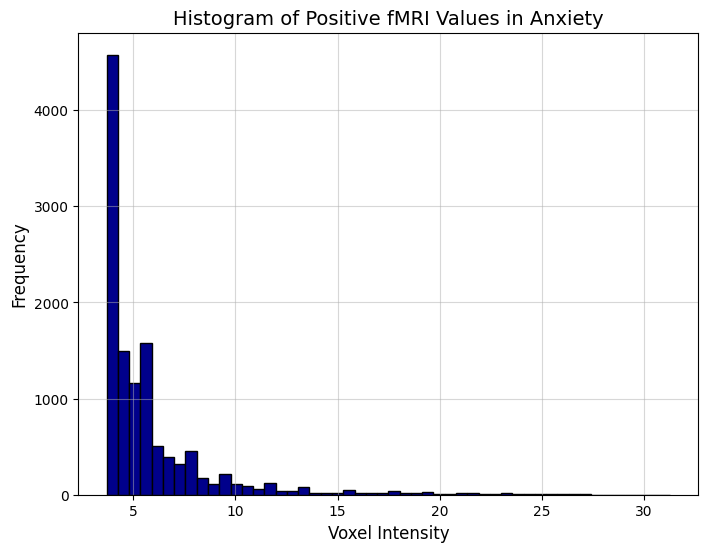

In [9]:
# Histogram of the functional data values
import nibabel as nib # Used to process neuroimaging data 
import numpy as np # Used for efficient manipulation of large data arrays
import matplotlib.pyplot as plt # Used to visualize the data 

# Load the functional MRI data file
func_file = '.\\anxiety_uniformity-test_z_FDR_0.01.nii.gz' 
func_img = nib.load(func_file)

# Get the data array from the image
func_data = func_img.get_fdata()

# Select all positive values (values > 0)
positive_values = func_data[func_data > 0]

# Plot the histogram
plt.figure(figsize=(8, 6))  # Set the figure size
plt.hist(positive_values, bins=50, color='darkblue', edgecolor='black')

# Customization of the plot
plt.title("Histogram of Positive fMRI Values in Anxiety", fontsize=14) 
plt.xlabel("Voxel Intensity", fontsize=12)  
plt.ylabel("Frequency", fontsize=12) 
plt.grid(True, linestyle='-', alpha=0.5) 

# Show the plot
plt.show()

